# Day 23: Advanced Regression Techniques

## Introduction

Astute readers may have noticed during the Day 22 lesson that some of the `customer_data.csv` plots were not great fits across the entire domain of the data. This is because there was a non-linear element (an $x^2$ term) in the function I used to build that dataset out of random numbers. Most data we'll encounter is not perfectly linear, but we can still use regression. A higher order function may describe the relationships between our independent variables and the dependent variable. We are not limited to $y = mx + c$, or even $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$ -- we can include $x_n^2, x_n^3, ...$ as if they were new independent variables, and give our regression line the freedom to match any polynomial function.

We'll just need to steer clear of overfitting: with unlimited terms, it's arbitrarily simple to draw a polynomial function that passes through *every* data point perfectly. This is unlikely to translate into predictive power outside of training, though. Lasso and Ridge are specific forms of regularization designed to address overfitting by penalizing the size of the coefficients. Keep an eye out for the penalty term ($\lambda$) which controls the complexity of the model.

A general polynomial regression model can be represented as:

$ y = \beta_0 + \beta_1x_1 + \beta_2x_1^2 + \ldots + \beta_nx_1^n + \epsilon $

Where:
- $y$ is the dependent variable.
- $x_1, x_1^2, \ldots, x_1^n$ are the predictor variables and their polynomial terms up to degree \(n\).
- $\beta_0, \beta_1, \ldots, \beta_n$ are the coefficients.
- $\epsilon$ represents the model error.

To get acquainted with the topic, let's take a peek at what adding additional degrees to the polynomial can do:

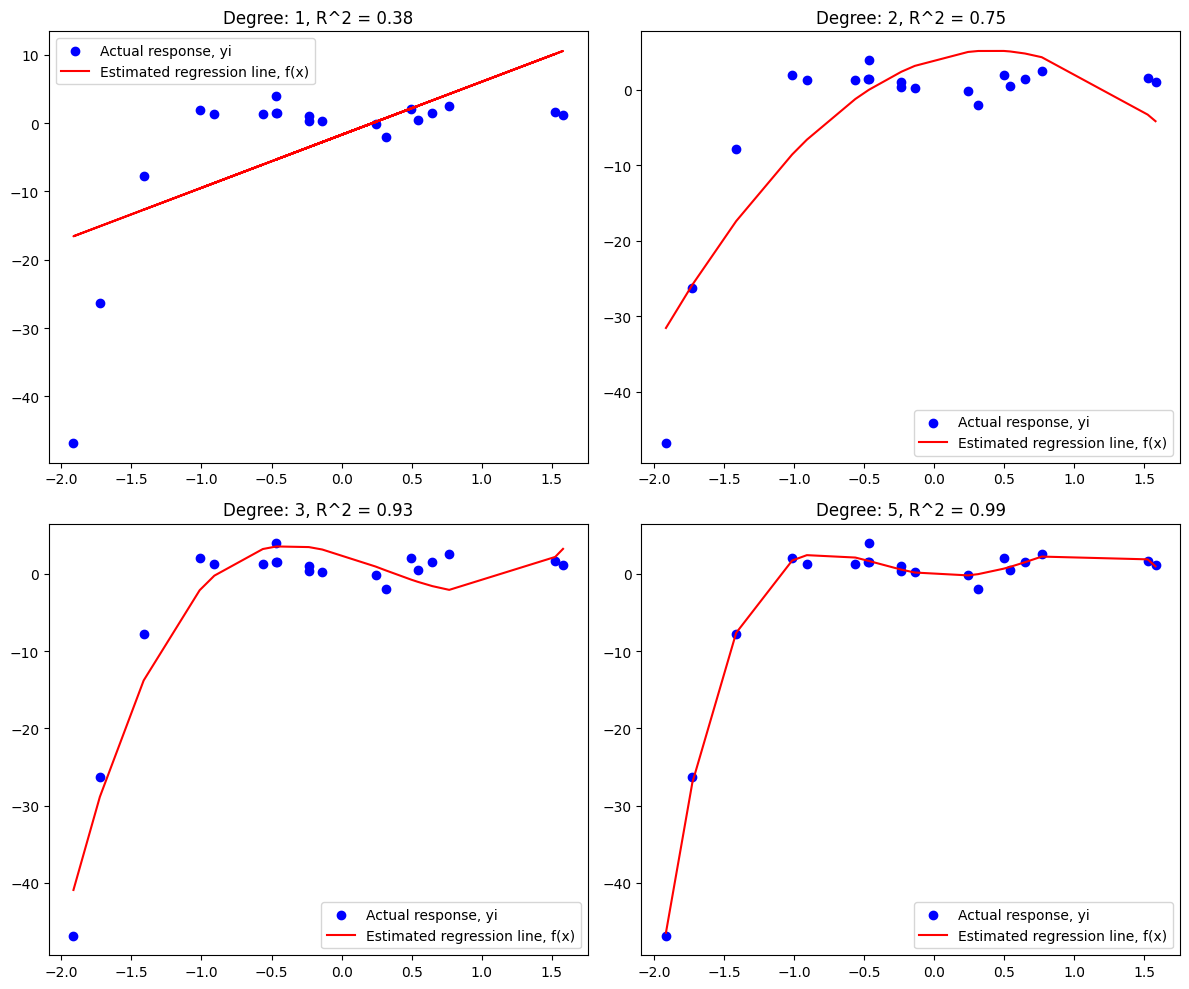

In [1]:
# overview plot
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Generating demo data
np.random.seed(42)
x = np.random.normal(0, 1, 20)

# This is the actual equation, so we could check exactly what coefficients our regression found.
y= -3.8 * x**4 + 3.4 * x**3 + 6.6 * x**2 - 2.5 * x + np.random.normal(0, 1, 20)

# Reshape x for sklearn
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Simple linear regression
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred_linear = linear_regressor.predict(x)

# Polynomial regression (underfit)
poly_features2 = PolynomialFeatures(degree=2)
x_poly2 = poly_features2.fit_transform(x)
poly_regressor2 = LinearRegression()
poly_regressor2.fit(x_poly2, y)
y_pred_poly2 = poly_regressor2.predict(x_poly2)

# Polynomial regression (well-fit)
poly_features3 = PolynomialFeatures(degree=3)
x_poly3 = poly_features3.fit_transform(x)
poly_regressor3 = LinearRegression()
poly_regressor3.fit(x_poly3, y)
y_pred_poly3 = poly_regressor3.predict(x_poly3)

# Polynomial regression (overfit)
poly_features5 = PolynomialFeatures(degree=5)
x_poly5 = poly_features5.fit_transform(x)
poly_regressor5 = LinearRegression()
poly_regressor5.fit(x_poly5, y)
y_pred_poly5 = poly_regressor5.predict(x_poly5)

# R^2 Scores
r2_linear = r2_score(y, y_pred_linear)
r2_poly2 = r2_score(y, y_pred_poly2)
r2_poly3 = r2_score(y, y_pred_poly3)
r2_poly5 = r2_score(y, y_pred_poly5)

# Plotting
plt.figure(figsize=(12, 10))

# Plot simple linear regression
plt.subplot(2, 2, 1)
plt.scatter(x, y, color='blue', label='Actual response, yi')
plt.plot(x, y_pred_linear, color='red', label='Estimated regression line, f(x)')
plt.title(f'Degree: 1, R^2 = {r2_linear:.2f}')
plt.legend()

# Plot underfit polynomial regression
plt.subplot(2, 2, 2)
plt.scatter(x, y, color='blue', label='Actual response, yi')
sorted_axis = np.argsort(x[:, 0])
plt.plot(x[sorted_axis], y_pred_poly2[sorted_axis], color='red', label='Estimated regression line, f(x)')
plt.title(f'Degree: 2, R^2 = {r2_poly2:.2f}')
plt.legend()

# Plot well-fit polynomial regression
plt.subplot(2, 2, 3)
plt.scatter(x, y, color='blue', label='Actual response, yi')
sorted_axis = np.argsort(x[:, 0])
plt.plot(x[sorted_axis], y_pred_poly3[sorted_axis], color='red', label='Estimated regression line, f(x)')
plt.title(f'Degree: 3, R^2 = {r2_poly3:.2f}')
plt.legend()

# Plot overfit polynomial regression
plt.subplot(2, 2, 4)
plt.scatter(x, y, color='blue', label='Actual response, yi')
sorted_axis = np.argsort(x[:, 0])
plt.plot(x[sorted_axis], y_pred_poly5[sorted_axis], color='red', label='Estimated regression line, f(x)')
plt.title(f'Degree: 5, R^2 = {r2_poly5:.2f}')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


## Polynomial Regression

In terms of execution, we can use `sklearn`'s `sklearn.preprocessing.PolynomialFeatures` functionality to perform linear regression with a higher degree. This is exactly what was used in the overview plot above, but I wanted to isolate the code for easier comparison to Lasso and Ridge regression below.

Some additional things to keep in mind:

1. **Choice of Polynomial Degree**: Determining the appropriate degree of the polynomial is critical. A higher-degree polynomial can fit the training data very well but might perform poorly on unseen data due to overfitting. Various model selection techniques, such as cross-validation, can be used to choose a polynomial degree that balances bias and variance.

2. **Feature Scaling**: Polynomial terms can have very different scales, especially for higher degrees, which can make the regression model sensitive to the scale of the input features. Normalizing or standardizing the features before applying polynomial regression can help with model convergence and interpretation.

3. **Multivariate Polynomial Regression**: While your introduction focuses on polynomial regression with a single independent variable ($x_1$), it's important to note that polynomial regression can be extended to multiple independent variables, allowing for interaction terms between different variables (e.g., $x_1x_2$, $x_1^2x_2$, etc.). This introduces complexity in model interpretation but can capture interactions between predictors that are not apparent in single-variable analyses.

4. **Computational Complexity**: As the degree of the polynomial and the number of independent variables increase, the computational complexity of fitting the regression model also increases. This is due to the larger number of terms and interactions that need to be calculated and optimized. It's important to balance the model's complexity with computational constraints.

5. **Analyzing Residuals**: When using polynomial regression, it becomes even more important to analyze residuals to ensure that the assumptions of linear regression are still met. This includes checking for homoscedasticity, normality of residuals, and absence of autocorrelation. If these assumptions are violated, the results of the regression, including any inference drawn from the coefficients, may not be valid.

### On `make_pipeline`

`make_pipeline` from `sklearn.pipeline` is a utility function that simplifies the process of creating a pipeline of transformations with a final estimator. In machine learning workflows, it's often necessary to chain together multiple steps such as preprocessing (like scaling features or applying polynomial expansions) and then applying a model (like LinearRegression, Lasso, or Ridge). A pipeline bundles these steps into a single object that behaves like a compound estimator. 

When you use `make_pipeline`, you can pass it a series of transformations followed by an estimator, and it automatically names each step based on its class. The steps are executed in sequence: each step's `fit_transform()` method is called on the input data (except for the last step, where only `fit()` is called), transforming the data along the way, until it finally fits the model on the transformed data. This streamlines the code, making it cleaner and easier to read, and reduces the risk of mistakes (like applying transformations to the training data but forgetting to do so on the test data).

The intro plot above does not use a pipeline, but Lasso and Ridge specifically benefit from it. In this next example, we will pipeline from [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) (a preprocessor) to [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) (a model).

This allows us to convert this block of code:

```python
# Polynomial regression (well-fit)
poly_features3 = PolynomialFeatures(degree=3)
x_poly3 = poly_features3.fit_transform(x)
poly_regressor3 = LinearRegression()
poly_regressor3.fit(x_poly3, y)
y_pred_poly3 = poly_regressor3.predict(x_poly3)
```

into this:

```python
poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly.fit(X, y)
```

You can imagine that as you add additional steps to transform your data, the first style of code will grow from 6 lines, to 9, to 12... while the second example simply adds more "machinery" to the sequence described in `make_pipeline(...)`.

For instance, when used with `LinearRegression`, `Lasso`, or `Ridge` in the context of polynomial regression, you would typically create a pipeline that first expands your features into a polynomial feature space (using `PolynomialFeatures`) and then scales them (using `StandardScaler`, although not in these basic examples, it's a common practice), before finally applying the regression model. This ensures that the feature expansion and scaling are part of the model fitting process, which is particularly important for cross-validation and deploying the model for predictions on new data.

To get the coefficients and intercept out of a pipeline that ends in linear regression, you'll have to reach inside the pipeline via the name it generates for its different steps. `poly_regressor3.coef_` becomes `poly['linearregression'].coef`, where the string `'linearregression'` is generated from the `LinearRegression` object that was passed into the pipeline.

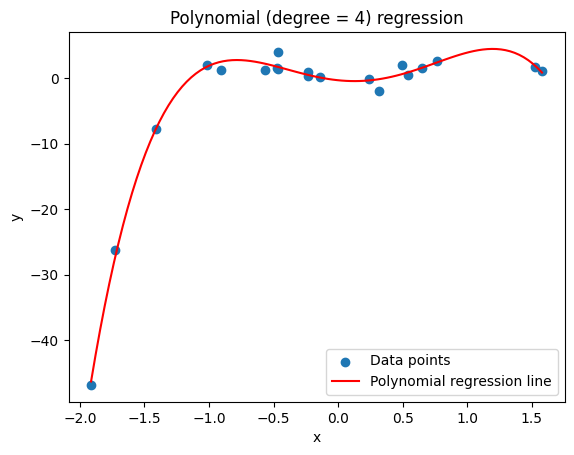

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
# Generating demo data
np.random.seed(42)
x = np.random.normal(0, 1, 20)
X = x[:, np.newaxis]

# This is the actual equation, so we could check exactly what coefficients our regression found.
y = -3.8 * x**4 + 3.4 * x**3 + 6.6 * x**2 - 2.5 * x + np.random.normal(0, 1, 20)

# Reshape x for sklearn
x = x[:, np.newaxis]
y = y[:, np.newaxis]

degree = 4  # choosing the same degree as the true model
poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly.fit(X, y)

# Generating points for plotting the regression line
x_plot = np.linspace(min(X), max(X), 100)
y_plot = poly.predict(x_plot)

plt.scatter(x, y, label='Data points')
sorted_axis = np.argsort(x[:, 0])
plt.plot(x_plot, y_plot, label='Polynomial regression line', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial (degree = 4) regression')
plt.show()

In [6]:
poly

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [10]:
poly['linearregression'].coef_

array([[ 0.        , -2.00193104,  7.3848762 ,  3.00349368, -4.16571691]])

In [11]:
poly['linearregression'].intercept_

array([-0.32345315])

## Lasso Regression

Lasso regression adds a penalty equal to the absolute value of the magnitude of coefficients. This can lead not only to small coefficients but can actually shrink some of them to zero, effectively performing variable selection. Using that feature of Lasso regression, you don't have to interpret the usefulness of a variable - if it's not important to the model, then its coefficients will drop to zero. However, to achieve this result, you'll have to tune your lambda ($\lambda$) value. If $\lambda$ is too small, the penalty effect might be negligible, leading to little improvement over ordinary least squares regression. If $\lambda$ is too large, too many variables might be eliminated, resulting in underfitting. Techniques such as cross-validation can be used to select an optimal $\lambda$.

The objective function for Lasso regression is:

$ \text{Minimize: } \frac{1}{2N} \sum_{i=1}^{N} (y_i - \sum_{j=1}^{n} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{n} |\beta_j| $

Where:
- $N$ is the number of observations.
- $\lambda$ is the regularization parameter controlling the strength of the penalty.
- The first term is the Mean Squared Error, and the second term is the L1 penalty.



Other things to keep in mind:

- Lasso regression is sensitive to the scale of the input variables, so standardizing the data (to have 0 mean and unit variance) before applying Lasso regression is a common practice.
- While Lasso can lead to sparse solutions, Ridge regression is preferred when multicollinearity is present among the features.

The introduction plot used `sklearn.linear_model.LinearRegression` to perform regression with different degrees of polynomials. Although Lasso might not perfectly capture the relationship in polynomial terms without specifically including polynomial features, this code will illustrate the process:


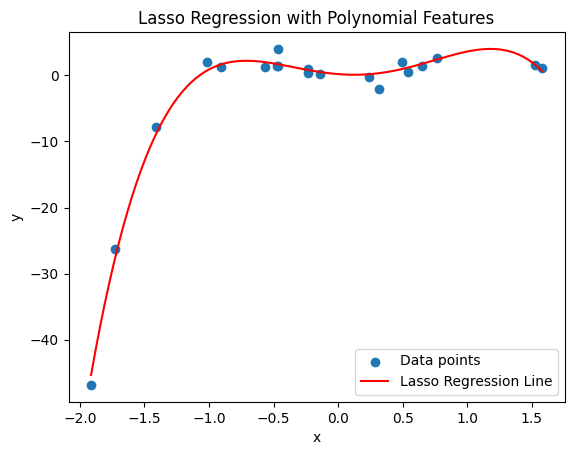

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generating demo data
np.random.seed(42)
x = np.random.normal(0, 1, 20)
y = -3.8 * x**4 + 3.4 * x**3 + 6.6 * x**2 - 2.5 * x + np.random.normal(0, 1, 20)
X = x[:, np.newaxis]

degree = 4  # choosing the same degree as the true model
lasso_poly = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1, max_iter=10000))
lasso_poly.fit(X, y)

# Generating points for plotting the regression line
x_plot = np.linspace(min(x), max(x), 100)
X_plot = x_plot[:, np.newaxis]
y_plot = lasso_poly.predict(X_plot)

# Plotting the data points and the regression line
plt.scatter(x, y, label='Data points')
plt.plot(x_plot, y_plot, label='Lasso Regression Line', color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lasso Regression with Polynomial Features')
plt.show()

In [12]:
lasso_poly['lasso'].coef_

array([ 0.        , -1.55260439,  5.72240286,  2.90811749, -3.66350745])

In [13]:
lasso_poly['lasso'].intercept_

0.19943027115730638

- **Choosing Degree and $\lambda$**: The choice of `degree=4` for the polynomial features and `alpha=0.1` for the Lasso regression penalty (`$\lambda$`) is somewhat arbitrary here and might need adjustment based on cross-validation to find the optimal model complexity and regularization strength.
- **Max Iterations**: Increasing `max_iter` in `Lasso()` might be necessary for the algorithm to converge, especially for higher degrees of polynomials or smaller values of $\alpha$ (`lambda`).

## Ridge Regression

Ridge regression adds a penalty equal to the square of the magnitude of coefficients. All coefficients are shrunk by the same factor (none are eliminated).

The objective function for Ridge regression is:

$ \text{Minimize: } \frac{1}{2N} \sum_{i=1}^{N} (y_i - \sum_{j=1}^{n} \beta_j x_{ij})^2 + \lambda \sum_{j=1}^{n} \beta_j^2 $

- Similarly, $N$ and $\lambda$ have the same definitions as in Lasso.
- The first term again represents the Mean Squared Error, and the second term is the L2 penalty.

1. **Effect of the Penalty**: Ridge regression is particularly useful when dealing with multicollinearity or when you have more predictors than observations.

2. **Scaling Importance**: standardizing the features in Ridge regression is important due to the square of the coefficients being included in the penalty term. Features on larger scales can have disproportionately large effects on the formulation.

3. **Choosing $\lambda$ for the bias-variance trade-off**: A higher $\lambda$ increases bias but reduces variance, whereas a lower $\lambda$ does the opposite. The optimal $\lambda$ minimizes the mean squared error of predictions.

4. **Computational Aspects**: Ridge regression tends to be computationally more efficient than Lasso for a large number of features, mainly because the solution is obtained through matrix operations that have computationally efficient implementations.


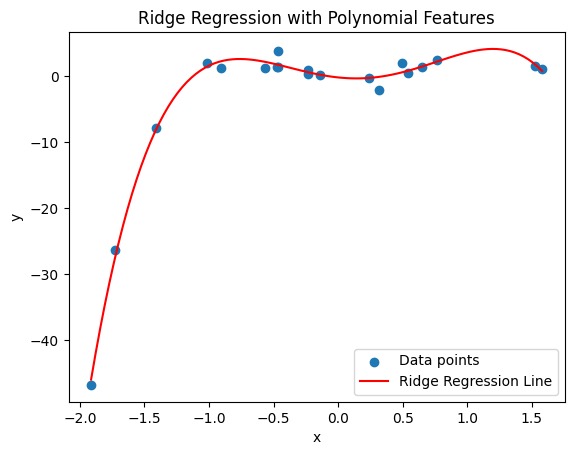

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generating demo data using the same snippet
np.random.seed(42)
x = np.random.normal(0, 1, 20)
y = -3.8 * x**4 + 3.4 * x**3 + 6.6 * x**2 - 2.5 * x + np.random.normal(0, 1, 20)
X = x[:, np.newaxis]

# Using polynomial features again since our relationship is non-linear
degree = 4
ridge_poly = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.1))
ridge_poly.fit(X, y)

# Generating points for plotting
x_plot = np.linspace(min(x), max(x), 100)
X_plot = x_plot[:, np.newaxis]
y_plot = ridge_poly.predict(X_plot)

# Plotting
plt.scatter(x, y, label='Data points')
plt.plot(x_plot, y_plot, color='red', label='Ridge Regression Line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ridge Regression with Polynomial Features')
plt.show()

In [14]:
ridge_poly['ridge'].coef_

array([ 0.        , -2.05626925,  6.75667935,  3.06069885, -3.96459941])

In [16]:
ridge_poly['ridge'].intercept_

-0.14654769263455236

## Exercise For The Reader

Lasso and Ridge regression could be applied to sklearn's included [California housing data set](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).



* Don't forget to do a test train split.
* It's probably best to use a scaler.
* selecting variables is important, but can be thought of as part science and part art. Try a few and see what helps.

In [33]:
# starter code
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
fetched = fetch_california_housing(as_frame=True)
X = fetched['data']
Y = fetched['target']

# Splitting dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [58]:
# model configuration
from sklearn.preprocessing import StandardScaler

degrees = 8
ridge_poly = make_pipeline(PolynomialFeatures(degrees), StandardScaler(), Ridge(alpha=0.1))
ridge_poly.fit(X_train, Y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=8)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1))])

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions
predictions = ridge_poly.predict(X_test)

# Evaluation
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'MSE: {mse}')
print(f'R-squared: {r2}')

MSE: 620.2980353830641
R-squared: -472.3621683634644


In [60]:
# examine the concrete results of the model - prediction vs test data's label
# the dataset provides home values in fractions of $100,000, so we convert the prediction to real dollars.
print(f"""Input data:
{X_test[:1]}

Median house value: ${Y_test.iloc[0] * 100:.2f}k
Predicted value: ${predictions[0] * 100:.2f}k""")

Input data:
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
20046  1.6812      25.0  4.192201   1.022284      1392.0  3.877437     36.06   

       Longitude  
20046    -119.01  

Median house value: $47.70k
Predicted value: $70.53k


Can you improve it with data preprocessing or altering the model parameters?

Have fun!

## Additional Resources

-   **Resource 1:** [Advanced Linear Regression With Python](https://realpython.com/linear-regression-in-python/#polynomial-regression) (Guide on polynomial regression, Lasso, and Ridge regression in Python)
-   **Resource 2:** [Machine Learning: Polynomial Regression with Python](https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386) (Tutorial on polynomial regression and its application in Python)